# Sample selection
The random sample dataset is composed of marginal ice zone (MIZ) locations and dates from 9 Arctic regions. The dates are selected based on the climatology of sea ice cover for each region. Each scene is 100 km by 100 km and centered on a location where the NSIDC climate data record v5 (CDR) of sea ice concentration shows between 15 and 85%. The CDR is used to find candidate samples, as the dataset can be accessed quickly. Since the resolution is 25 km, each candidate scene only contains a few CDR pixels. We refine the candidate samples by computing the sea ice cover from the MASIE 4 km data.
Only scenes with at least 25% sea ice fraction (area with SIC > 15%) are considered. 

MODIS images are available since 2000 (terra) and 2002 (aqua), however the MASIE sea ice extent imagery is only available since 2006. So we draw our sample from 2006 to 2023 (the last full year of NSIDC data at time of writing).

We include some samples drawn from the same sampling procedure with slightly different region definitions. We refined the region definitions to avoid overlaps and to align better with the IHO marginal sea definitions, and we extended the time range an additional year. To ensure that the sampling was still random according to the procedure described above, we drew a large set of new sample locations, then computed the relative fraction within the old domain and with the modified domain. Using the relative fractions from the overlapping and non-overlapping regions, we drew samples from the new regions until the proportion was correct.






Sample selection needs to balance two competing issues:
(a) the size of the image needs to be large enough that there is a useful range of floe sizes that can be resolved
(b) the number of scenes should be large enough that we can consider it a representative random sample
Because the time needed to manually annotate an image is proportional to the image area, the number of images that can be analyzed is strongly limited by the image size. 

First, nine regions spanning the circumpolar Arctic seasonal ice zones were selected (Figure 1, Table 1). The regions were selected to have equal area. The file `setup_locations.py` makes a CSV file `data/metadata/region_definitions.csv`.

We perform stratified random sampling to select a set of images for the validation dataset.
We use the NSIDC Sea Ice Concentration Climate Data Record (SIC CDR) to identify periods of time that each region contains some overlap with the sea ice region. We acknowledge that uncertainty in SIC CDR is high during the summer. Since the purpose of using the SIC CDR in the random sampling is to find a wide range of sea ice conditions, rather than to make inferences about sea ice physics in these regions, we consider the SIC CDR suitable for this purpose.

Within each region, we follow the following procedure
* Randomly choose a start year and a date between March and region-specific end date (max September 30)
* Select a center point (x, y) that is at least 250 km from the border
* Calculate sea ice fraction for the point
* If the sea ice fraction is at least 0.25, add date and center point to list of cases
* Check the number of cases.
   * If the minimum number of cases per month is met, move to the next region.
    
We start by generating a set of samples larger than is needed for the validation dataset, saving 10 candidate cases per month, per region. We then stratify the sample to get minimum 3 samples per month, with randomly chosen additional samples chosen to bring the number to 21 dates per region for locations where sea ice is present less than 7 months of the summer.


# TBD items
* Resampling strategy to determine the number of samples outside the original sample boundary.
* Method to choose from the data in overlap regions
* Redefine borders based on landmarks

# Defining the regions
We define our sampling regions based on the International Hydrographic Organization (IHO) Limits of Oceans and Seas. As the satellite data is provided in polar stereographic coordinates, we select rectangular regions with bounds selected from the landmarks dividing the IHO defined seas. Thus, the boundaries are not intended to be exactly identical to the IHO seas.

Greenland Sea: Northern bound is the line from northernmost point of Spitzbergen to the Northernmost part of Greenland. Eastern bound is the west coast of West Spitzbergen and Jan Mayen. Southern bound is Iceland.

Barents Sea: West bound is line joining West Spitzbergen to Bear Island to North Cape of norway. Northwest bound is west spitzbergen to cape leigh smith. Norht bound across Bolshoy Ostrov, Alexandra Land, and northern coast of Franz-Josef Land. West coasts of Novaya Zemlya.

Kara Sea on the north is Severnaya Zemlya, on the east is Komsomolets Island, Bolshevik Island.

We use the north extent of the greenland sea as the lower bound for the barents-kara region, and the center of Severnaya Zemlya as the left extent. Upper bound is the Tamyr Peninsula. Right bound is the entrance to the White Sea.
Laptev Sea: left extent the New Siberian Islands, right extent 

East siberian sea: left extent Wrangel Island, right extent the New Siberian Islands. North extent: we go all the way to Point Barrow in polar stereographic coordinates. Upper extent the russian mainland.

Bering-Chukchi Seas: right extent is wrangel island, lower extent is point barrow. Extended domain 1500 km to the left and upwards. 



In [32]:
regions = {
    'greenland_sea': 
        {'left_x': 290374,
         'right_x': 1244051,
         'upper_y': -725683,
         'lower_y': -2234665},
    'barents_kara_seas':
        {'left_x': 700817,
         'right_x': 2398925,
         'upper_y': 1173623,
         'lower_y': -725683},
    'laptev_sea': 
        {'left_x': -152260, 
         'right_x': 700817,
         'upper_y': 2119251,
         'lower_y': 895970},
    'east_siberian_sea':
        {'left_x': -1472117,
         'right_x': -152260,
         'upper_y': 2038772,
         'lower_y': 753120},
    'bering_chukchi_seas':
        {'left_x': -1472117 - 1500e3,
         'right_x': -1472117,
         'upper_y': 753120 + 1500e3,
         'lower_y': 753120},
    'beaufort_sea':
        {'left_x':-2339278,
         'right_x': -2339278 + 1500e3,
         'upper_y': 753120,
         'lower_y': -303168
        },
    'baffin_bay':
        {'left_x': -987231,
         'right_x': -97937,
         'upper_y': -818234,
         'lower_y': -818234 - 1500e3, 
        },
    'hudson_bay':
        {'left_x': -2795941,
         'right_x': -1655207,
         'upper_y': -1868686,
         'lower_y': -3635000
        }, 
    'sea_of_okhostk':
        {'left_x': -1549890,
         'right_x': -49890,
         'upper_y': 4214708,
         'lower_y': 2714708
        }
}
# sea ice area by region?

In [5]:
%run ../scripts/setup_locations.py

                        left_x    right_x    upper_y    lower_y   center_x  \
greenland_sea         290374.0  1244051.0  -725683.0 -2234665.0   767212.0   
barents_kara_seas     700817.0  2398925.0  1173623.0  -725683.0  1549871.0   
laptev_sea           -152260.0   700817.0  2119251.0   895970.0   274278.0   
east_siberian_sea   -1472117.0  -152260.0  2038772.0   753120.0  -812188.0   
bering_chukchi_seas -2972117.0 -1472117.0  2253120.0   753120.0 -2222117.0   
beaufort_sea        -2339278.0  -839278.0   753120.0  -303168.0 -1589278.0   
baffin_bay           -987231.0   -97937.0  -818234.0 -2318234.0  -542584.0   
hudson_bay          -2795941.0 -1655207.0 -1868686.0 -3635000.0 -2225574.0   
sea_of_okhostk      -1549890.0   -49890.0  4214708.0  2714708.0  -799890.0   

                      center_y  center_lon  center_lat  
greenland_sea       -1480174.0    -17.6011     74.6976  
barents_kara_seas     223970.0     53.2228     75.6170  
laptev_sea           1507610.0    124.6890     7

<a list of 1 Line2D objects>

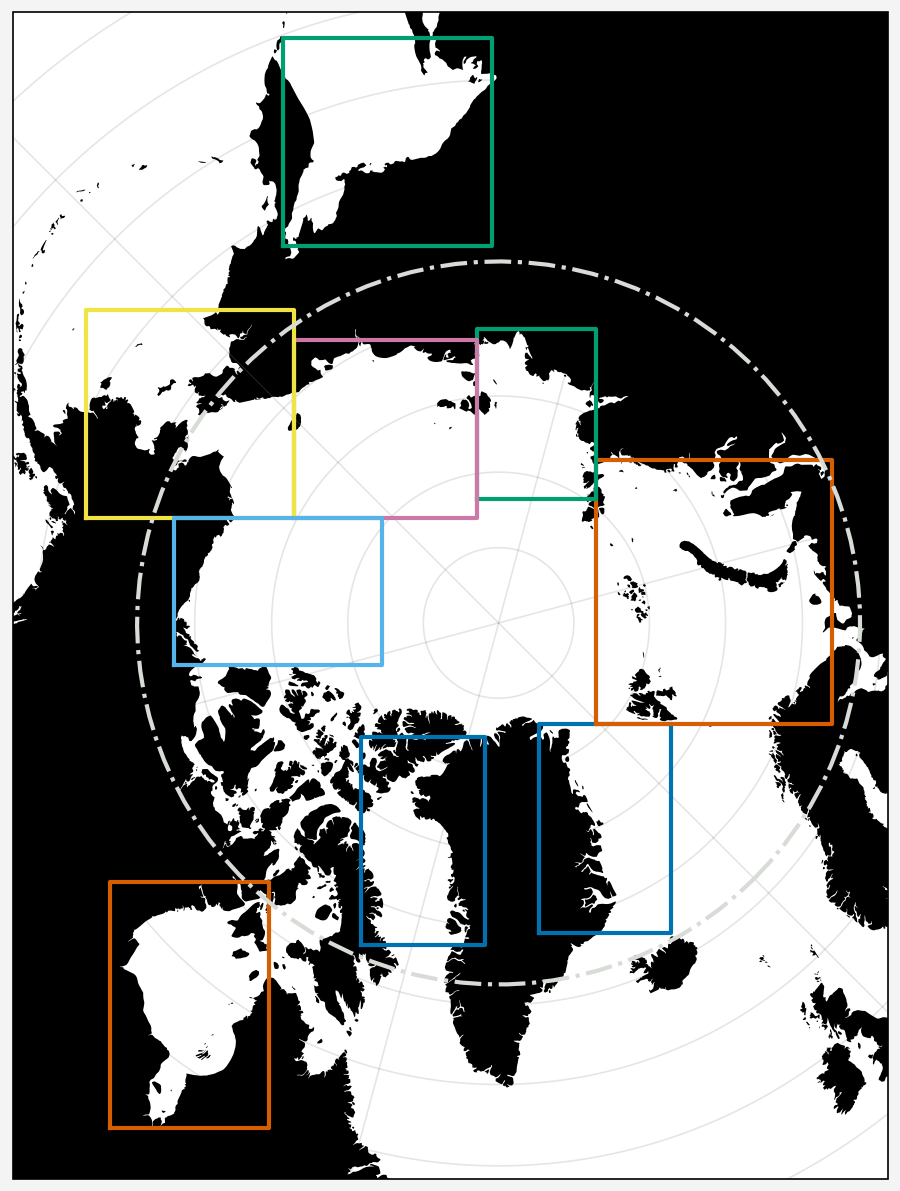

In [36]:
import pandas as pd
import proplot as pplt
import cartopy.crs as ccrs
import numpy as np
import warnings
warnings.simplefilter('ignore')

pplt.rc['reso'] = 'med'
pplt.rc['cartopy.circular'] = False

crs = ccrs.CRS('epsg:3413')
fig, ax = pplt.subplots(width=4.5, proj='npstere', proj_kw={'lon_0': -45})
ax.format(land=True, color='k', boundinglat=52, landzorder=0, latmax=90)
ax.set_extent([-3.5e6, 2.8e6, -4e6, 4.4e6], crs=crs)

for region in regions:
    xbox = np.array([regions[region][coord] for coord in ['left_x', 'left_x', 'right_x', 'right_x', 'left_x']])
    ybox = np.array([regions[region][coord] for coord in ['lower_y', 'upper_y', 'upper_y', 'lower_y', 'lower_y']])
    ax.plot(xbox, ybox, transform=crs)

ax.plot(np.linspace(0, 360, 100), np.ones(100)*66.3, ls='-.', color='light gray')

In [26]:
import xarray as xr
failed = []
for year in range(2000, 2024):
    files = os.listdir('/Users/dwatkin2/Documents/research/data/nsidc_daily_cdr_v5/{y}'.format(y=year))
    for f in files:
        if '.nc' in f:
            try:
                with xr.open_dataset('/Users/dwatkin2/Documents/research/data/nsidc_daily_cdr_v5/{y}/{f}/'.format(y=year, f=f), engine='netcdf') as ds:
                    print(f)
                    pass
            except:
                failed.append(f)


In [29]:
ds = xr.open_dataset("/Users/dwatkin2/Documents/research/data/nsidc_daily_cdr_v5/2000/sic_psn25_20000101_F13_v05r00.nc")

In [30]:
ds

<xarray.Dataset>
Dimensions:                               (time: 1, y: 448, x: 304)
Coordinates:
  * x                                     (x) float64 -3.838e+06 ... 3.738e+06
  * y                                     (y) float64 5.838e+06 ... -5.338e+06
  * time                                  (time) datetime64[ns] 2000-01-01
Data variables:
    crs                                   int32 ...
    cdr_seaice_conc_interp_spatial_flag   (time, y, x) uint8 ...
    cdr_seaice_conc_qa_flag               (time, y, x) uint8 ...
    cdr_seaice_conc_interp_temporal_flag  (time, y, x) uint8 ...
    cdr_seaice_conc                       (time, y, x) float32 ...
    cdr_seaice_conc_stdev                 (time, y, x) float32 ...
Attributes: (12/46)
    Conventions:               CF-1.11, ACDD-1.3
    date_created:              2024-11-12T00:03:39Z
    time_coverage_start:       2000-01-01T00:00:00Z
    time_coverage_end:         2000-01-01T23:59:59Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P1D
    ...                        ...
    geospatial_lat_min:        30.980564
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

In [40]:
sic_data = []
for year in range(2000, 2022):
    ds = xr.open_dataset("~/Documents/research/data/nsidc_daily_cdr_v4/aggregate/seaice_conc_daily_nh_{y}_v04r00.nc".format(y=year))
    sic_data.append(ds)

TypeError: concat() missing 1 required positional argument: 'dim'

In [50]:
ds_april = xr.concat([ds.sel(tdim=ds.time.dt.month == 4) for ds in sic_data], dim='tdim')

In [55]:
ds_sept = xr.concat([ds.sel(tdim=ds.time.dt.month == 9) for ds in sic_data], dim='tdim')

In [80]:
ds_april

<xarray.Dataset>
Dimensions:                         (tdim: 660, y: 448, x: 304)
Coordinates:
    time                            (tdim) datetime64[ns] 2000-04-01 ... 2021...
    xgrid                           (x) float32 -3.838e+06 ... 3.738e+06
    ygrid                           (y) float32 5.838e+06 ... -5.338e+06
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc                 (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0
    melt_onset_day_cdr_seaice_conc  (tdim, y, x) float32 nan nan nan ... nan nan
    nsidc_bt_seaice_conc            (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0
    nsidc_nt_seaice_conc            (tdim, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0
    projection                      (tdim) |S1 b'' b'' b'' b'' ... b'' b'' b''
    qa_of_cdr_seaice_conc           (tdim, y, x) float32 16.0 16.0 ... 16.0 16.0
    spatial_interpolation_flag      (tdim, y, x) float32 nan nan nan ... nan nan
    stdev_of_cdr_seaice_conc        (tdim, y, x) float32 nan nan nan ... nan nan
    temporal_interpolation_flag     (tdim, y, x) float32 nan nan nan ... nan nan
    latitude                        (tdim, y, x) float32 31.1 31.2 ... 34.47
    longitude                       (tdim, y, x) float32 168.3 168.1 ... -9.999
Attributes: (12/39)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc
    ...                        ...
    acknowledgment:            This project was supported in part by a grant ...
    platform:                  DMSP 5D-2/F13 > Defense Meteorological Satelli...
    sensor:                    SSM/I > Special Sensor Microwave/Imager
    date_created:              2021-06-21T17:49:10Z
    time_coverage_start:       2000-01-01T00:00:00Z
    time_coverage_end:         2000-12-31T23:59:59Z

In [57]:
ds_april_mean = ds_april[['cdr_seaice_conc']].where(ds_april[['cdr_seaice_conc']] <= 1).mean(dim='tdim')
ds_sept_mean = ds_sept[['cdr_seaice_conc']].where(ds_sept[['cdr_seaice_conc']] <= 1).mean(dim='tdim')

In [115]:
crs0 = pyproj.CRS('WGS84')
crs1 = pyproj.CRS('epsg:3413')
transformer_xy = pyproj.Transformer.from_crs(crs0, crs_to=crs1, always_xy=True)
transformer_ll = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)
x, y = transformer_xy.transform(np.ravel(ds_april['longitude'].isel(tdim=0).data.squeeze()),
                                np.ravel(ds_april['latitude'].isel(tdim=0).data.squeeze()))
s = ds_april['longitude'].isel(tdim=0).data.squeeze().shape
X = np.reshape(x, s)
Y = np.reshape(y, s)

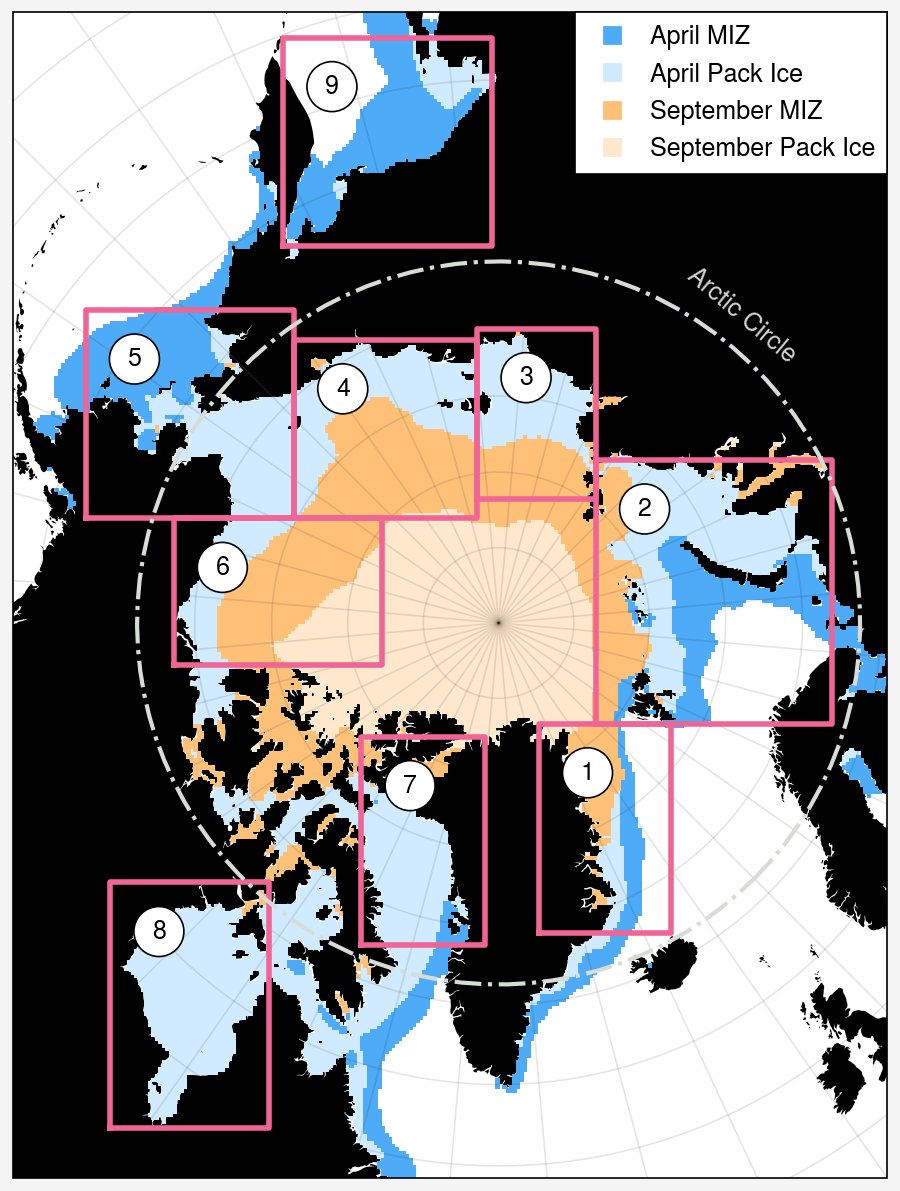

In [158]:
import pandas as pd
import proplot as pplt
import cartopy.crs as ccrs
import numpy as np
import warnings
warnings.simplefilter('ignore')

pplt.rc['reso'] = 'med'
pplt.rc['cartopy.circular'] = False

crs = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70)
fig, ax = pplt.subplots(width=4.5, proj='npstere', proj_kw={'lon_0': -45})
ax.format(land=True, color='k', boundinglat=52, landzorder=0, latmax=90, facecolor='w', lonlocator=10)
ax.set_extent([-3.5e6, 2.8e6, -4e6, 4.4e6], crs=crs)

for region in regions:
    xbox = np.array([regions[region][coord] for coord in ['left_x', 'left_x', 'right_x', 'right_x', 'left_x']])
    ybox = np.array([regions[region][coord] for coord in ['lower_y', 'upper_y', 'upper_y', 'lower_y', 'lower_y']])
    ax.plot(xbox, ybox, transform=crs, lw=2, color='pink5')

miz = (ds_april_mean['cdr_seaice_conc'] > 0.15) & (ds_april_mean['cdr_seaice_conc'] < 0.85)
april_miz = np.ma.masked_array(np.ones(miz.data.shape), mask=~miz)    

miz = (ds_sept_mean['cdr_seaice_conc'] > 0.15) & (ds_sept_mean['cdr_seaice_conc'] < 0.85)
sept_miz = np.ma.masked_array(np.ones(miz.data.shape), mask=~miz)    

apr_pack_ice = (ds_april_mean['cdr_seaice_conc'] >= 0.85) & (ds_april_mean['cdr_seaice_conc'] <= 1)
apr_pack_ice = np.ma.masked_array(np.ones(apr_pack_ice.data.shape), mask=~apr_pack_ice)    

sep_pack_ice = (ds_sept_mean['cdr_seaice_conc'] >= 0.85) & (ds_sept_mean['cdr_seaice_conc'] <= 1)
sep_pack_ice = np.ma.masked_array(np.ones(sep_pack_ice.data.shape), mask=~sep_pack_ice)    


ax.pcolormesh(X, Y, apr_pack_ice, vmin=0, vmax=1, color='blue1', alpha=1,
              transform=crs, label='')

ax.pcolormesh(X, Y, april_miz, vmin=0, vmax=1, color='blue4', alpha=1,
              transform=crs, label='')

ax.pcolormesh(X, Y, sep_pack_ice, vmin=0, vmax=1, color='orange1', alpha=1,
              transform=crs, label='')

ax.pcolormesh(X, Y, sept_miz, vmin=0, vmax=1, color='orange3', alpha=1,
              transform=crs, label='September MIZ')

h = [ax.plot([],[],marker='s', lw=0, color=color) for color in ['blue4', 'blue1', 'orange3', 'orange1']]
ax.legend(h, ['April MIZ', 'April Pack Ice', 'September MIZ', 'September Pack Ice'], loc='ur', ncols=1, alpha=1)
idx = 1
for region in regions:
    ax.text(regions[region]['left_x'] + 300e3,
            regions[region]['upper_y'] - 400e3, str(idx),
            transform=crs, bbox=True, bboxalpha=1,
            border=False, color='k', borderwidth=0,
            bboxstyle='circle', bboxcolor='w', zorder=10)
    idx += 1
ax.text(100, 69, 'Arctic Circle', color='lightgray', transform=ccrs.PlateCarree(), rotation=-40)
    
ax.plot(np.linspace(0, 360, 100), np.ones(100)*66.3, ls='-.', color='light gray')
fig.save('../figures/sample_locations_map.png', dpi=300)

In [39]:
df = pd.read_csv('../data/metadata/daily_sea_ice_fraction.csv', index_col=0, parse_dates=True)
df['doy'] = df.index.dayofyear

p90 = df.groupby('doy').quantile(0.9)
for region in p90:
    print(region, p90[region][p90[region] > 0.05].index.max())

greenland_sea 274
barents_kara_seas 274
laptev_sea 274
east_siberian_sea 274
bering_chukchi_seas 236
beaufort_sea 274
baffin_bay 274
hudson_bay 218
sea_of_okhostk 178


In [47]:
doy = 218
pd.to_datetime('2001-01-01') + pd.to_timedelta(doy - 1, unit='d') 

Timestamp('2001-08-06 00:00:00')

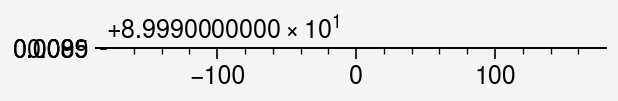

In [113]:
fig, ax = pplt.subplots()
miz = (ds_april_mean['cdr_seaice_conc'] > 0.15) & (ds_april_mean['cdr_seaice_conc'] < 0.85)
ax.imshow(np.ma.masked_array(np.ones(miz.data.shape), mask=~miz),
              color='b', alpha=0.5, extent=[x.min(), x.max(), y.max(), y.min()])


In [22]:
for year in range(2000, 2021):
    ! mkdir /Users/dwatkin2/Documents/research/data/nsidc_daily_cdr_v5/$year

mkdir: /Users/dwatkin2/Documents/research/data/nsidc_daily_cdr_v5/2020: File exists


shading: region with 15-85% SIC in April and September, 2006-2024.

## Get start and end dates from the SIF data

In [37]:
import os
import pyproj
import numpy as np
import pandas as pd
import xarray as xr

In [335]:
sif_data = pd.read_csv('../data/metadata/daily_sea_ice_fraction.csv', index_col=0, parse_dates=True)
regions = pd.read_csv('../data/metadata/region_definitions.csv', index_col='region')
threshold = 0.05
end_doy = sif_data.groupby(sif_data.index.dayofyear).quantile(0.90).apply(lambda x: x[x >= threshold].index.max())
start_doy = pd.Series(pd.to_datetime('2003-03-01').dayofyear, index=end_doy.index)

In [336]:
# regions.merge(end_doy, left_index=True, right_index=True)
regions.loc[end_doy.index, 'end_doy'] = end_doy.values
regions.loc[start_doy.index, 'start_doy'] = start_doy.values
regions.loc[start_doy.index, 'start_mmdd'] = (pd.to_timedelta(regions['start_doy'] - 1, unit='D') + pd.to_datetime('2001-01-01 00:00')).dt.strftime('%b %d')
regions.loc[end_doy.index, 'end_mmdd'] = (pd.to_timedelta(regions['end_doy'] - 2, unit='D') + pd.to_datetime('2001-01-01 00:00')).dt.strftime('%b %d')
regions.sort_values('center_lon').loc[:, ['start_doy', 'end_doy', 'start_mmdd', 'end_mmdd']].to_csv('../data/metadata/sample_start_end_times.csv')

In [337]:
regions.loc[:, ['center_lat', 'center_lon', 'start_mmdd', 'end_mmdd']]

,center_lat,center_lon,start_mmdd,end_mmdd
region,,,,
baffin_bay,75,-65,Mar 01,Sep 30
barents-kara_seas,75,54,Mar 01,Sep 29
beaufort_sea,75,-135,Mar 01,Sep 30
bering_strait,65,-170,Mar 01,Aug 10
chukchi-east_siberian_sea,75,166,Mar 01,Sep 30
greenland_sea,77,-10,Mar 01,Sep 30
hudson_bay,60,-83,Mar 01,Aug 19
laptev_sea,75,125,Mar 01,Sep 30
sea_of_okhostk,58,148,Mar 01,Jun 26


## Generate large random sample prior to stratification
These functions carry out the random sampling and sea ice fraction checks.

In [338]:
sic_dataloc = '/Users/dwatkin2/Documents/research/data/nsidc_daily_cdr/'
def compute_sic(left_x, right_x, bottom_y, top_y, sic_data):
    """Computes the sea ice extent as a fraction of total area within the region bounded
    by <left_x>, <right_x>, <bottom_y>, and <top_y> using the netcdf file <sic_data>. Assumes
    that sic_data is the NSIDC SIC CDR."""

    x_idx = (sic_data.xgrid >= left_x) & (sic_data.xgrid <= right_x)
    y_idx = (sic_data.ygrid >= bottom_y) & (sic_data.ygrid <= top_y)
    
    with_ice = ((sic_data.sel(x=x_idx, y=y_idx)['cdr_seaice_conc'] > 0.15) & \
                (sic_data.sel(x=x_idx, y=y_idx)['cdr_seaice_conc'] <= 1))
    coast_mask = (sic_data.sel(x=x_idx, y=y_idx)['cdr_seaice_conc'] > 1).sum() 
    total_area_pixels = np.prod(with_ice.shape)
    sic_area_pixels = with_ice.sum().data
    sic_mean = (sic_data.sel(x=x_idx, y=y_idx).where(with_ice))['cdr_seaice_conc'].mean().data
    return {'sea_ice_fraction': np.round(sic_area_pixels/(total_area_pixels - coast_mask.data), 3),
            'mean_sea_ice_concentration': np.round(sic_mean, 3)}

def find_candidates(n_samples, region_info, dx, sic_path,
                    sif_threshold=0.25, margin=250, start_year=2003, end_year=2022,
                    min_samples_per_month=10):
    """Generates a list of candidate locations for the validation dataset. Initial samples were selected using the
    same steps as shown here. This function places the steps in one place for convenience, and implements a correction
    to the SIC calculation used in the initial version.
    
    n: sets the number of candidates to generate.
    region_info: a row from the region_definitions table. Must include start_doy and end_doy.
    dx is the dimension in km of the sample scene.
    sic_path: path to folder with the NSIDC CDR data.
    sif_threshold: between 0 and 1. The ice fraction needed to retain a sample.
    margin: distance in km that the center needs to be from the edge of the region boundary.
    """
    
    dx_meters = dx*1e3
    region = region_info.name
    start_doy = region_info.start_doy
    end_doy = region_info.end_doy
    left_x = region_info.left_x
    right_x = region_info.right_x
    lower_y = region_info.lower_y
    upper_y = region_info.top_y

    # calculations are done in polar stereographic
    # use pyproj to convert back to lon/lat for final table
    crs0 = pyproj.CRS('WGS84')
    crs1 = pyproj.CRS('epsg:3413')
    transformer_ll = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)
    
    # we keep track of the number of samples generated per month
    # the range is set up this way so that we don't get extra months in 
    # leap years. For other uses the start and end doy could be adjusted differently.
    start_month = (pd.to_datetime('2000-01-01') + pd.to_timedelta(start_doy, unit='d')).month
    end_month = (pd.to_datetime('2000-01-01') + pd.to_timedelta(end_doy - 1, unit='d')).month
    samples_by_month = pd.Series(0, index=np.arange(start_month, end_month+1))
    candidates = []
    
    def in_box(x, y, margin):
        """Convenience function that checks whether point x, y is in region.
        Returns True if x, y in the box."""
        if left_x <= x:
            if right_x >= x:
                if lower_y <= y:
                    if upper_y >= y:
                        return True
        return False
    
    while np.any(samples_by_month < min_samples_per_month):
        # Randomly select date from months with not enough samples
        year = np.random.choice(np.arange(start_year, end_year+1))
        remaining_months = list(samples_by_month[samples_by_month < min_samples_per_month].index)
        month = np.random.choice(remaining_months)
        days_in_month = pd.to_datetime(str(year) + '-' + str(month) + '-01').daysinmonth
        day = np.random.choice(np.arange(1, days_in_month+1))
        date = str(year) + str(month).zfill(2) + str(day).zfill(2)
        
        # Load SIC data for the date. If any MIZ regions, randomly select center point
        # with sea ice concentration between 15 and 85 percent, otherwise pass    
        min_ice = 0.15
        max_ice = 0.85
        
        files = os.listdir(sic_path + str(year))
        if 'f17' in files[0]:
            f = 'seaice_conc_daily_nh_' + date + '_f17_v04r00.nc'
        else:
            f = 'seaice_conc_daily_nh_' + date + '_f13_v04r00.nc'
            
        with xr.open_dataset(sic_dataloc + str(year) + '/' + f) as sic_data:
            # generate center point
            X, Y = np.meshgrid(sic_data.xgrid, sic_data.ygrid)
            miz = (sic_data['cdr_seaice_conc'] >= min_ice) & (sic_data['cdr_seaice_conc'] <= max_ice)
            miz = np.ravel(miz.squeeze())
            xoptions = np.ravel(X)[miz]
            yoptions = np.ravel(Y)[miz]
            inside = np.array([in_box(x, y, margin) for x, y in zip(xoptions, yoptions)])
    
            if np.any(inside):
                ii = np.random.choice(np.arange(len(xoptions))[inside])
                
                # get x, y coordinates
                x0 = xoptions[ii]
                y0 = yoptions[ii]

                # define scene centered at x0, y0
                left_x0 = x0 - dx_meters/2
                right_x0 = x0 + dx_meters/2
                lower_y0 = y0 - dx_meters/2
                upper_y0 = y0 + dx_meters/2
                
                sic_results = compute_sic(left_x0, right_x0, lower_y0, upper_y0, sic_data)
                # check SIF threshold
                if sic_results['sea_ice_fraction'] >= sif_threshold:
                    lon0, lat0 = transformer_ll.transform(x0, y0)
                    candidates.append([region, pd.to_datetime(date).strftime('%Y-%m-%d'),
                                       lon0, lat0, x0, y0, sic_results['sea_ice_fraction'],
                                       sic_results['mean_sea_ice_concentration']])
                    samples_by_month[month] += 1

    candidates = pd.DataFrame(candidates,
            columns=['region', 'start_date', 'center_lon', 'center_lat',
                     'center_x', 'center_y', 'sea_ice_fraction', 'mean_sea_ice_concentration'])

    candidates['month'] = pd.to_datetime(candidates['start_date'].values).month
    return candidates

## Selecting additional cases
The original run of the random sample algorithm included cases with overestimated sea ice fraction. We run the sampling again to replace these cases. Additionally, we calculate the corrected sea ice fraction.

In [345]:
candidates = []
for name, row in regions.iterrows():
    candidates.append(find_candidates(n_samples=100,
                region_info=row,
                dx=100,
                sic_path=sic_dataloc,
                sif_threshold=0.25,
                margin=250, start_year=2003, end_year=2022,
                min_samples_per_month=20))
candidates = pd.concat(candidates)    

This section takes the original version of the candidate case dataset, re-calculates the SIC, and adds new candidate samples that pass the criteria for start time and for sea ice fraction.

In [354]:
# Take original random sample with SIC error, drop the cases with < 0.25 sea ice fraction
# Drop the samples from outside each regions time window
sic_dataloc = '/Users/dwatkin2/Documents/research/data/nsidc_daily_cdr/'
candidate_validation_table = pd.read_csv('../../data/candidate_validation_table.csv', index_col=0)
candidate_validation_table['start_date'] = pd.to_datetime(candidate_validation_table['start_date'].values)
candidate_validation_table.drop('ice_frac', inplace=True, axis=1)
for idx, row in candidate_validation_table.iterrows():
    year = row.start_date.year
    files = os.listdir(sic_dataloc + str(year))
    if 'f17' in files[0]:
        f = 'seaice_conc_daily_nh_' + row.start_date.strftime('%Y%m%d') + '_f17_v04r00.nc'
    else:
        f = 'seaice_conc_daily_nh_' + row.start_date.strftime('%Y%m%d') + '_f13_v04r00.nc'
    dx = 100e3
    left_x = row.center_x - dx/2
    right_x = row.center_x + dx/2
    bottom_y = row.center_y - dx/2
    top_y = row.center_y + dx/2
    with xr.open_dataset(sic_dataloc + str(year) + '/' + f) as sic_data:
        sic_results = compute_sic(left_x, right_x, bottom_y, top_y, sic_data)
        candidate_validation_table.loc[idx, 'sea_ice_fraction'] = sic_results['sea_ice_fraction']
        candidate_validation_table.loc[idx, 'mean_sea_ice_concentration'] = sic_results['mean_sea_ice_concentration']

In [355]:
# Make a column "keep" that is only true if the start date is in the right
# window and if the sea ice fraction is at least 0.25.
passing_candidates = candidate_validation_table.loc[candidate_validation_table['sea_ice_fraction'] >= 0.25].copy()     
passing_candidates['start_doy'] = passing_candidates['start_date'].dt.dayofyear
passing_candidates['keep'] = True
for region, group in passing_candidates.groupby('region'):
    passing_candidates.loc[group.index, 'keep'] = group['start_doy'] <= regions.loc[region, 'end_doy']

# Add more samples to the mix where there are less than 10 passing samples per month
min_per_month = 10
new_sample_list = []
for (region, month), group in passing_candidates.groupby(['region', 'month']):
    n_samples = group['keep'].sum()
    if n_samples < min_per_month:
        # check available sample dates
        # will have length zero if nothing available past the last date DOY
        new_samples = candidates.loc[(candidates['region'] == region) & (candidates['month'] == month),:]
        new_samples = new_samples.loc[
            pd.to_datetime(new_samples['start_date']).dt.dayofyear < regions.loc[region, 'end_doy']]
        if len(new_samples) > 0:
            new_sample_list.append(new_samples.sample(min_per_month - n_samples))

In [356]:
# Concatenate the dataframes
new_samples = pd.concat(new_sample_list)
for c in passing_candidates:
    if c not in new_samples.columns:
        new_samples[c] = np.nan
new_samples['keep'] = True
new_samples = new_samples.loc[:, passing_candidates.columns].copy()
updated_candidates = pd.concat(objs=[passing_candidates, new_samples], join='outer', axis=0).reset_index(drop=True)

In [359]:
# Sort and reindex
updated_candidates['datetemp'] = pd.to_datetime(updated_candidates['start_date'])
updated_candidates['start_date'] = [d.strftime('%Y-%m-%d') for d in updated_candidates['datetemp']]
updated_candidates['start_doy'] = [d.dayofyear for d in updated_candidates['datetemp']]
updated_candidates = updated_candidates.sort_values(['region', 'datetemp']).drop('datetemp', axis=1)
updated_candidates.reset_index(drop=True, inplace=True)

In [364]:
# Get the case numbers that were initially used
all_cases = pd.read_csv('../data/metadata/case_list.csv', index_col=0)
all_cases.reset_index(inplace=True)
all_cases['case_number'] = all_cases['case_number'].astype(int)
all_cases = all_cases.loc[all_cases.satellite=='aqua'] # only looking at one day at a time

updated_candidates['case_number'] = 'NA'
for idx, case_data in all_cases.iterrows():
    uc_idx = (updated_candidates['region'] == case_data.region) & (updated_candidates['start_date'] == case_data.start_date)
    if len(updated_candidates[uc_idx]) == 1:
        updated_candidates.loc[uc_idx, 'case_number'] = str(case_data.case_number).zfill(3)
    else:
        xdiff = updated_candidates['center_x'] - case_data.center_x
        ydiff = updated_candidates['center_y'] - case_data.center_y
        uc_idx = uc_idx & ((np.abs(xdiff) < 1) & (np.abs(ydiff) < 1))
        if len(updated_candidates[uc_idx]) == 1:
            updated_candidates.loc[uc_idx, 'case_number'] = str(case_data.case_number).zfill(3)

In [365]:
# Assign case numbers to samples in cases where there are less than 3 samples in a month
min_per_month = 3
new_sample_list = []
start_new_idx = np.max([int(x) for x in updated_candidates['case_number'] if x != 'NA']) + 1
for (region, month), group in updated_candidates.groupby(['region', 'month']):
    n_samples = (group['case_number'] != 'NA').sum()
    if n_samples < min_per_month:
        # check available sample dates
        # needs to be unassigned (case number is NA)
        # will have length zero if nothing available past the last date DOY
        new_samples = group.loc[(pd.to_datetime(group['start_date']).dt.dayofyear < regions.loc[region, 'end_doy']) & \
                                 (group['case_number'] == 'NA'), :]
        
        if len(new_samples) > 0:
            new_sample_list = new_samples.sample(min_per_month - n_samples)
            for idx in new_sample_list.index:
                updated_candidates.loc[idx, 'case_number'] = str(start_new_idx).zfill(3)
                start_new_idx += 1

In [367]:
# for sites with less than 21 total dates, randomly draw from the 
# remaining unassigned dates, weighting the samples by the number 
# available per month
sample_size = 21
num_samples = updated_candidates.loc[updated_candidates.keep & (updated_candidates.case_number != 'NA')].groupby('region').count()['start_date']
start_new_idx = np.max([int(x) for x in updated_candidates['case_number'] if x != 'NA']) + 1

for region, group in updated_candidates.loc[
    (updated_candidates.case_number == 'NA') & updated_candidates.keep].groupby('region'):
    if num_samples[region] < sample_size:
        n = group.groupby('month').transform('count')['region']
        w = n/np.sum(n)
        new_samples = group.sample(sample_size - num_samples[region], weights=w)
        for idx in new_samples.index:
            updated_candidates.loc[idx, 'case_number'] = str(start_new_idx).zfill(3)
            start_new_idx += 1

In [371]:
case_list = updated_candidates.loc[(updated_candidates.case_number != 'NA') & updated_candidates.keep].copy()
case_list.drop('keep', axis=1, inplace=True)

In [374]:
columns_order = ['case_number', 'region', 'start_date', 'center_lon', 'center_lat', 'center_x',
                 'center_y', 'month', 'sea_ice_fraction', 'mean_sea_ice_concentration', 'start_doy']
case_list.loc[:, columns_order].to_csv('../data/metadata/validation_dataset_case_list.csv', index=False)
updated_candidates.loc[updated_candidates.keep, columns_order].to_csv('../data/metadata/candidate_case_list.csv', index=False)

In [3]:
import proplot as pplt
import pandas as pd
import warnings
import cartopy.crs as ccrs
import numpy as np

case_list = pd.read_csv('../data/metadata/validation_dataset_case_list.csv')
case_list['start_date'] = pd.to_datetime(case_list['start_date'])

# Selected samples
Generate a map showing the location of the selected cases.

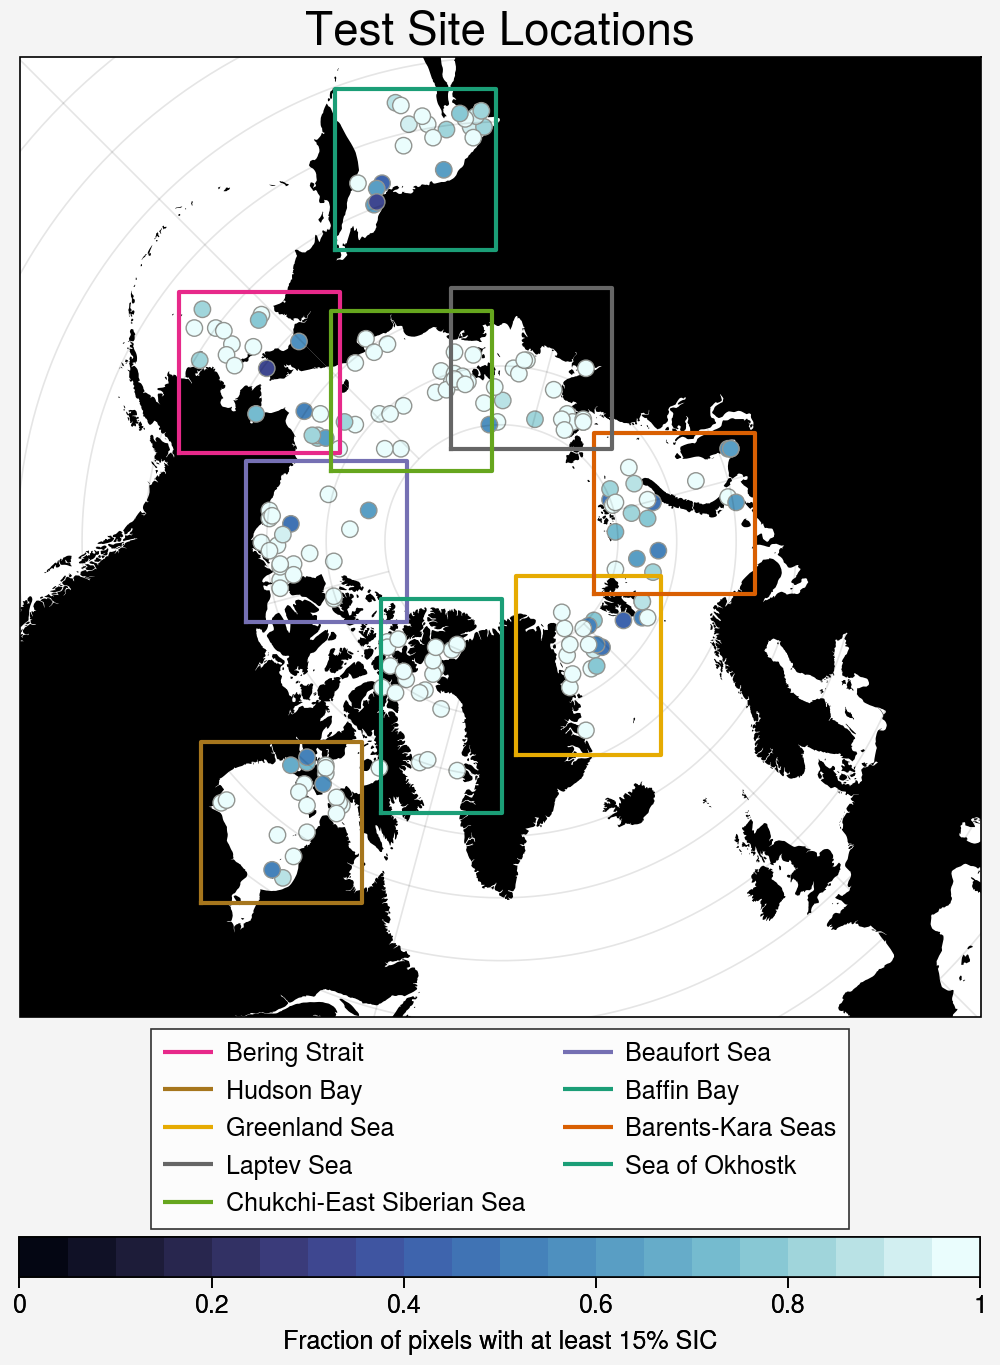

In [4]:
warnings.simplefilter('ignore')
pplt.rc['reso'] = 'med'
regions = pd.read_csv('../data/metadata/region_definitions.csv', index_col=0)

pplt.rc['reso'] = 'med'
pplt.rc['cartopy.circular'] = False

colors = {region: c['color'] for region, c in zip(
            regions.index,
            pplt.Cycle('dark2', len(regions)))}
linestyles = {region: ls for region, ls in zip(regions.index,
                        ['-', '-.', '--', '-', '-.', '--', '-.', '-', '--'])}

regions['print_title'] = [c.replace('_', ' ').title().replace('Of', 'of') for c in regions.index]
regions = regions.sort_values('center_lon')

fig, ax = pplt.subplots(width=5, proj='npstere', proj_kw={'lon_0': -45})
ax.format(land=True, color='k', boundinglat=50, landzorder=0)
h, l = [],[]
for region, lat, lon in zip(regions.index, 
                                 regions.center_lat, regions.center_lon):
    xbox = np.array(regions.loc[region, ['left_x', 'left_x', 'right_x', 'right_x', 'left_x']].astype(float))
    ybox = np.array(regions.loc[region, ['lower_y', 'top_y', 'top_y', 'lower_y', 'lower_y']].astype(float))
    

    ax.plot(xbox, ybox, ls='-', m='', color=colors[region], zorder=5,
            transform=ccrs.CRS('epsg:3413'), label=regions.loc[region, 'print_title'])  
# ax.legend(loc='b')
c = ax.scatter(case_list['center_x'], case_list['center_y'], c=case_list['sea_ice_fraction'],
           ms=35, m='o', transform=ccrs.CRS('epsg:3413'), label='',
               vmin=0, vmax=1, cmap='ice', edgecolor='gray', ew=0.5, N=20)
ax.legend(loc='b', ncols=2)
ax.colorbar(c, loc='b', label='Fraction of pixels with at least 15% SIC')
ax.format(title='Test Site Locations', fontsize=15)
# fig.save('../figures/location_map_example_sites.jpg', dpi=300)

In [2]:
import pyproj

top_y = -45685
left_x = -2211309
right_x = -1845656
bottom_y = -281984

# use pyproj to convert back to lon/lat for final table
crs0 = pyproj.CRS('WGS84')
crs1 = pyproj.CRS('epsg:3413')
transformer_ll = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)

x0 = 0.5*(left_x + right_x)
y0 = 0.5*(bottom_y + top_y)
transformer_ll.transform(x0, y0)

(-130.38241349957684, 71.37271893250961)

In [4]:
left_x,bottom_y,right_x,top_y

(-2211309, -281984, -1845656, -45685)

In [ ]:
-47192,-284817
bottom right = -1857970,-292865
bottom left = -1841874,-2216314